In [6]:
import utilities as ut
import construction as cs
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


%load_ext autoreload
%autoreload 2

from IPython.core.display import HTML
HTML('<style>.container { width:97% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

						 InVS13.dat


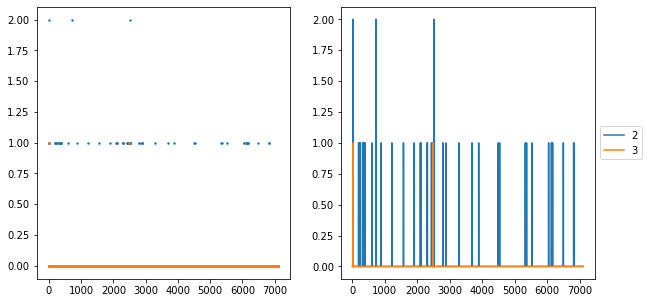

						 InVS15.dat


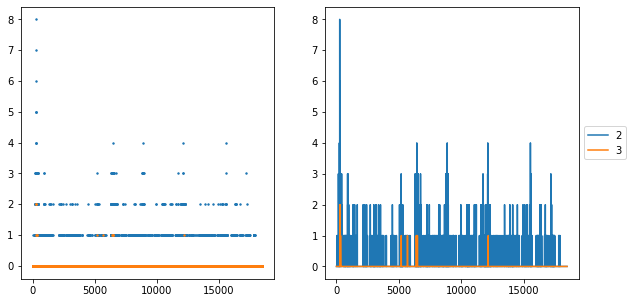

						 LH10.dat


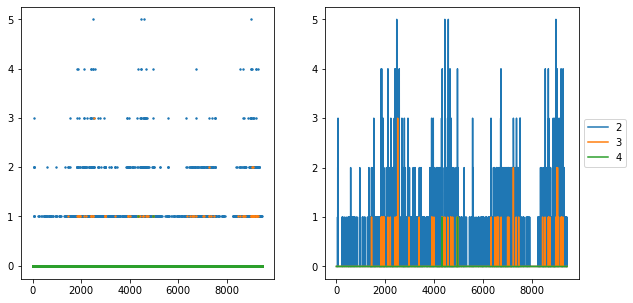

						 High_School11.dat


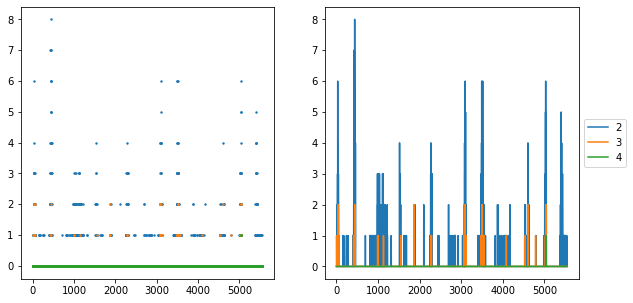

						 High_School12.dat


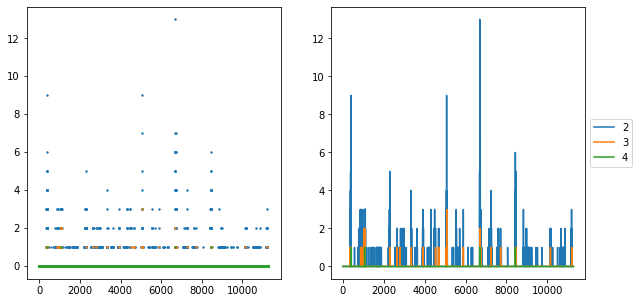

						 High_School13.dat


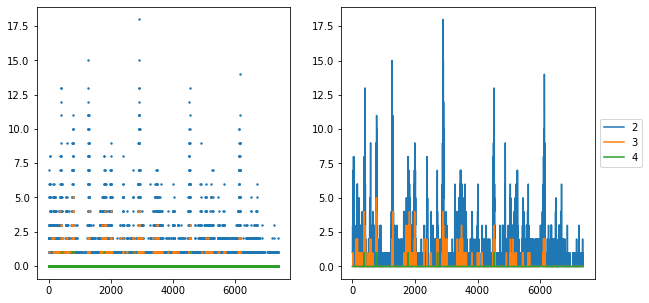

						 primaryschool.dat


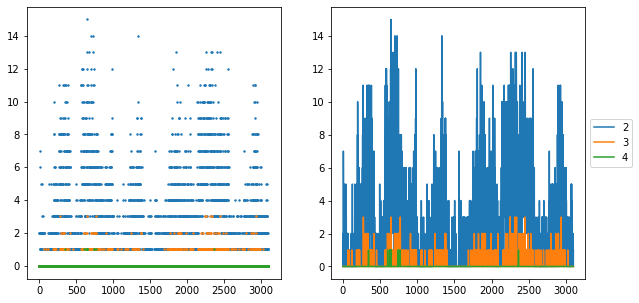

In [31]:
names = ["InVS13.dat","InVS15.dat", "LH10.dat",
         "High_School11.dat","High_School12.dat","High_School13.dat","primaryschool.dat"]
path_data = "../data/face-to-face/"

for name in names:
    print("\t\t\t\t\t\t "+name)
    data_in = cs.load_data(path_data+name)
    in13_arr = fun_tmp(data_in)
    plot_tmp(in13_arr)

In [29]:
def plot_tmp(sfhh_arr):
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    
    if (len(sfhh_arr) > 10):
        tmp = np.arange(0,len(sfhh_arr[0]))
        for i in range(0,10):
            if i > 1:
                plt.scatter(tmp,sfhh_arr[i],label=i ,s = 2)

        plt.subplot(122)

        for i in range(0,10):
            if i > 1:
                plt.plot(sfhh_arr[i],label=i)
    else:
        tmp = np.arange(0,len(sfhh_arr[0]))
        for i in range(len(sfhh_arr)):
            if i > 1:
                plt.scatter(tmp,sfhh_arr[i],label=i ,s = 2)

        plt.subplot(122)

        for i in range(len(sfhh_arr)):
            if i > 1:
                plt.plot(sfhh_arr[i],label=i)

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [3]:

def fun_tmp(data_in):
    data = data_in
    graphs, pos = cs.build_graphs(data,gap=19)

    arr = [[] for i in range(79)]



    for g in graphs:
        dic = dict()
        for i in nx.find_cliques(g):
            l = len(i)
            if (l in dic):
                dic[l] = dic[l] + 1
            else:
                dic[l] = 1

        for i in range(79):
            if(i in dic):
                arr[i].append(dic[i])
            else:
                arr[i].append(0)
    # togli gli zeri
    new_arr = []
    for i in arr:

        nnz = np.count_nonzero(i)
        if not(nnz == 0):
            new_arr.append(i)
            
    return(new_arr)


In [5]:
def get_number_conected_components(graphs):
    count = 0

    sg = list(nx.connected_component_subgraphs(graphs))
    sub_graphs = []

    for i in sg:
        if not(len(i)==1):
            count = count + 1
                
    return(count)
def get_conncted_components(data,gap):
    graphs,pos = cs.build_graphs(data,
                   gap = gap)
    
    array_of_subgraphs = []
    
    for g in graphs:
        sg = list(nx.connected_component_subgraphs(g))
        sub_graphs = []

        for i in sg:
            if not(len(i)==1):
                sub_graphs.append(i)
                
        array_of_subgraphs.append(sub_graphs)
        
    return(array_of_subgraphs)